<a href="https://colab.research.google.com/github/DanielGirald/Senalesysistemas/blob/main/corte_2/Modulacion_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modulacion AM
– Consulte en que consiste la modulación por amplitud por
deteccion coherente y sus aplicaciones.

EJEMPLO ILUSTRATIVO

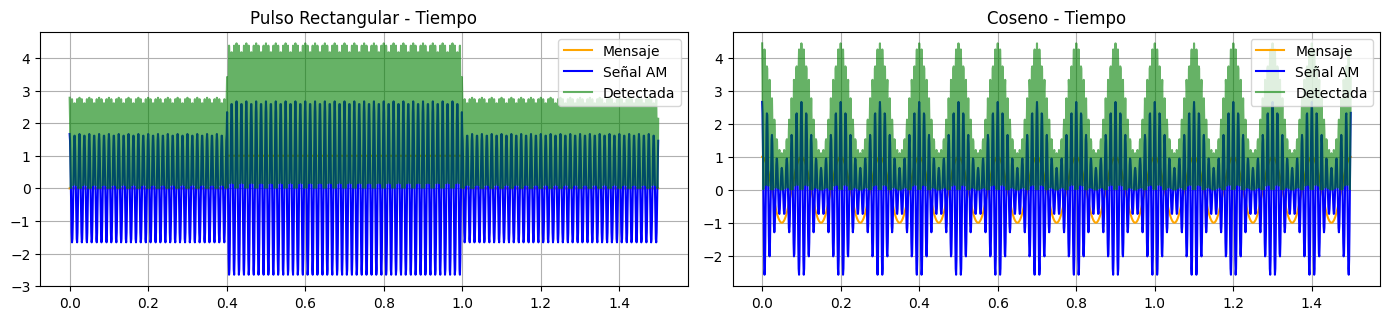

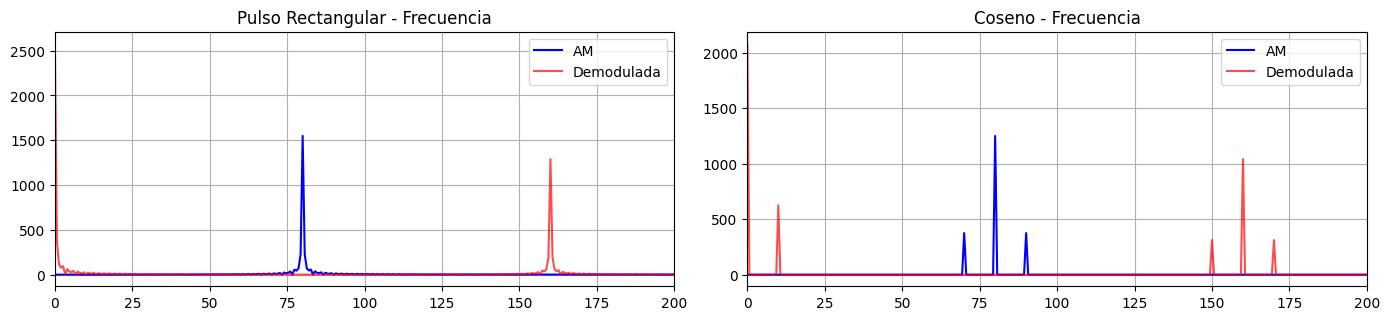

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# ================================
# Parámetros generales
# ================================
fs = 1000       # Frecuencia de muestreo [Hz]
T = 1.5         # Duración [s]
t = np.linspace(0, T, int(fs*T), endpoint=False)

fc = 80         # Frecuencia de portadora [Hz]
fm = 10         # Frecuencia del mensaje [Hz]
Im = 0.6        # Índice de modulación

# ================================
# Funciones auxiliares
# ================================
def generar_portadora(t, fc, Ac):
    return Ac * np.cos(2 * np.pi * fc * t)

def señal_AM(mensaje, fc, t, Im):
    Ac = np.max(np.abs(mensaje)) / Im
    portadora = generar_portadora(t, fc, Ac)
    modulada = (1 + mensaje / Ac) * portadora
    return modulada, portadora

def deteccion_coherente(modulada, portadora):
    return modulada * portadora

def graficar_tiempo(t, mensaje, modulada, demodulada, titulo):
    plt.plot(t, mensaje, label="Mensaje", color='orange')
    plt.plot(t, modulada, label="Señal AM", color='blue')
    plt.plot(t, demodulada, label="Detectada", color='green', alpha=0.6)
    plt.title(titulo)
    plt.legend()
    plt.grid()

def graficar_frecuencia(signal1, signal2, fs, titulo):
    freqs = rfftfreq(len(signal1), 1/fs)
    S1 = rfft(signal1)
    S2 = rfft(signal2)
    plt.plot(freqs, np.abs(S1), label="AM", color='blue')
    plt.plot(freqs, np.abs(S2), label="Demodulada", color='red', alpha=0.7)
    plt.title(titulo)
    plt.xlim(0, 200)
    plt.legend()
    plt.grid()

# ================================
# Señal 1: pulso rectangular
# ================================
m_pulso = ((t > 0.4) & (t < 1.0)).astype(float)
s_pulso, c_pulso = señal_AM(m_pulso, fc, t, Im)
demod_pulso = deteccion_coherente(s_pulso, c_pulso)

# ================================
# Señal 2: coseno
# ================================
m_cos = np.cos(2 * np.pi * fm * t)
s_cos, c_cos = señal_AM(m_cos, fc, t, Im)
demod_cos = deteccion_coherente(s_cos, c_cos)

# ================================
# Gráficas en el tiempo
# ================================
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
graficar_tiempo(t, m_pulso, s_pulso, demod_pulso, "Pulso Rectangular - Tiempo")

plt.subplot(2, 2, 2)
graficar_tiempo(t, m_cos, s_cos, demod_cos, "Coseno - Tiempo")
plt.tight_layout()
plt.show()

# ================================
# Gráficas en frecuencia
# ================================
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
graficar_frecuencia(s_pulso, demod_pulso, fs, "Pulso Rectangular - Frecuencia")

plt.subplot(2, 2, 2)
graficar_frecuencia(s_cos, demod_cos, fs, "Coseno - Frecuencia")
plt.tight_layout()
plt.show()


MODULACION AM

In [51]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


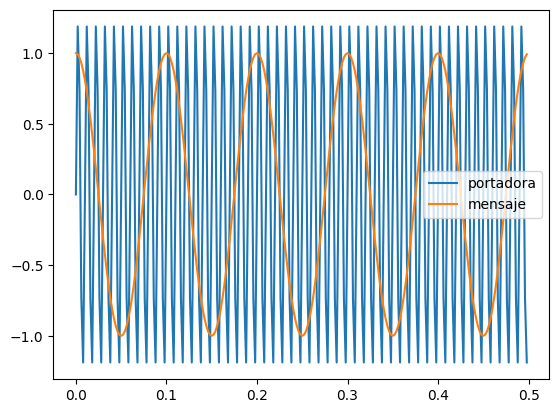

In [52]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

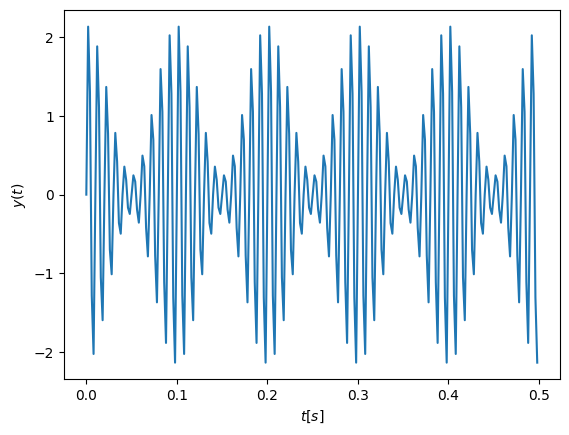

In [53]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

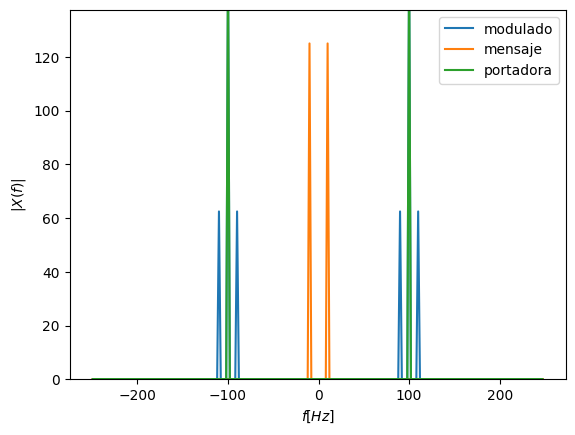

In [54]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [55]:
#Se instala api para descargar videos desde youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.6.9-py3-none-any.whl size=3017173 sha256=f36fbc53d54ba3cc0439ef04f4607233803435989a5e123e6e60d330e75b3cb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-wy6_2ui0/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
  Attempting uninstall: yt-dlp
    Found existing installation: yt-dlp 2025.6.9
    Uninstalling yt-dlp-2025.6.9:
      Successfully uninstalled yt-dlp-2025.6.9


In [56]:
link="https://www.youtube.com/watch?v=2t7dKY1NA3U"
!yt-dlp --extract-audio -o "tema" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=2t7dKY1NA3U
[youtube] 2t7dKY1NA3U: Downloading webpage
[youtube] 2t7dKY1NA3U: Downloading tv client config
[youtube] 2t7dKY1NA3U: Downloading tv player API JSON
[youtube] 2t7dKY1NA3U: Downloading ios player API JSON
[youtube] 2t7dKY1NA3U: Downloading m3u8 information
[info] 2t7dKY1NA3U: Downloading 1 format(s): 251
[download] Destination: tema
[download] 100% of    2.95MiB in 00:00:00 at 9.44MiB/s
[ExtractAudio] Destination: tema.mp3
Deleting original file tema (pass -k to keep)


In [57]:
!ffmpeg -y -i tema.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [58]:
!pip install soundfile

In [59]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [60]:
x.shape

(7820295, 2)

In [61]:
from IPython.display import Audio
Audio(x[int(fs*20):int(fs*25),:].T,rate=fs)

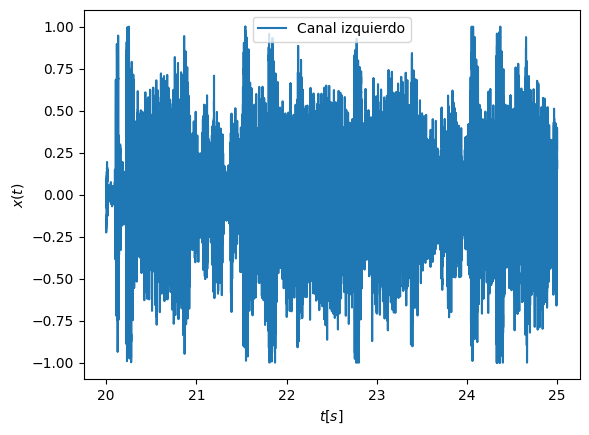

In [62]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),0]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs,label="Canal izquierdo")
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

In [63]:
len(xs)

240000

In [64]:
Im=float(input("Ingrese el indice de modulacion que desea:  "))

Ingrese el indice de modulacion que desea:  200


In [65]:
#Frecuencia portadora y muestreo

Fc = 1000 #frecuencia de portadora

ti = 20
tf = 25 #cantidad de periodos a graficar de la

Fs = 48000 #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo


Ac = max(abs(xs))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

0.005


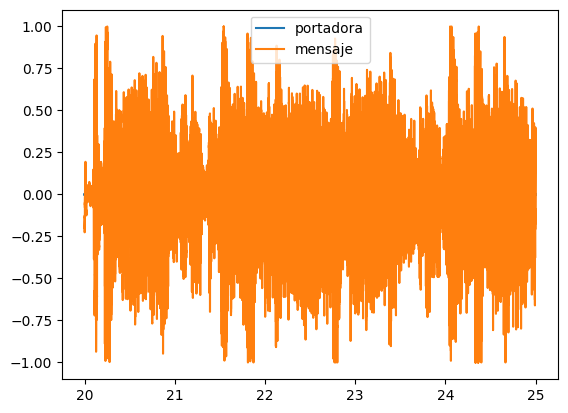

In [66]:
plt.plot(t,c,label='portadora')
plt.plot(t,xs,label='mensaje')
plt.legend()
plt.show()

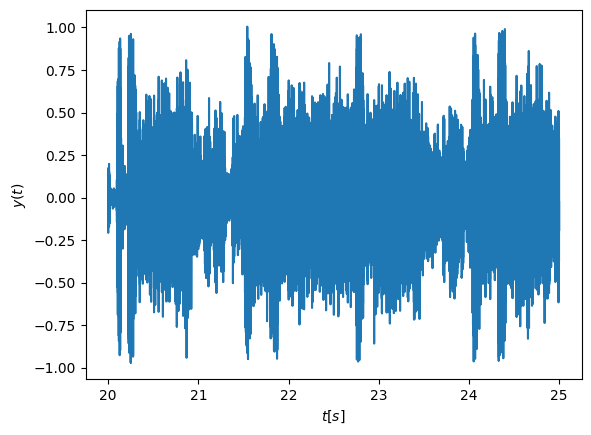

In [67]:
y = (1+xs/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

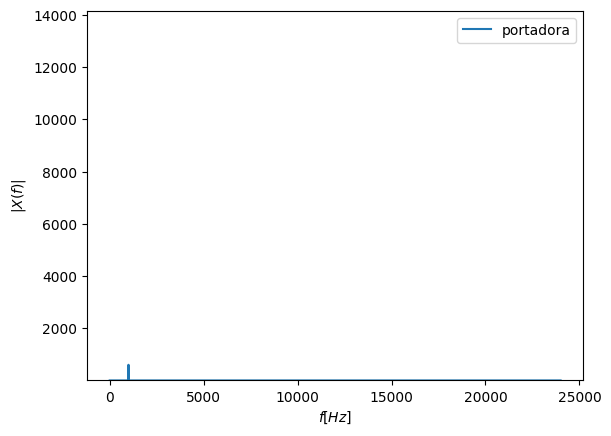

In [68]:
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xs)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

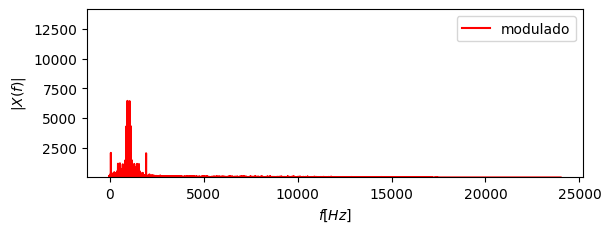

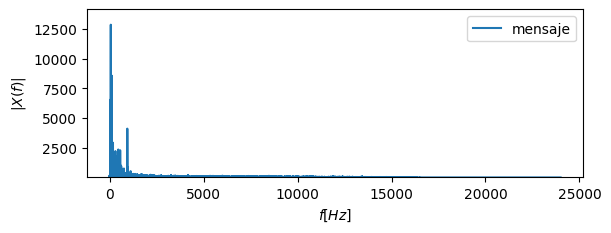

In [69]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [70]:
Audio(c,rate=fs)

In [71]:
Audio(xs,rate=fs)

In [72]:
Audio(y,rate=fs)

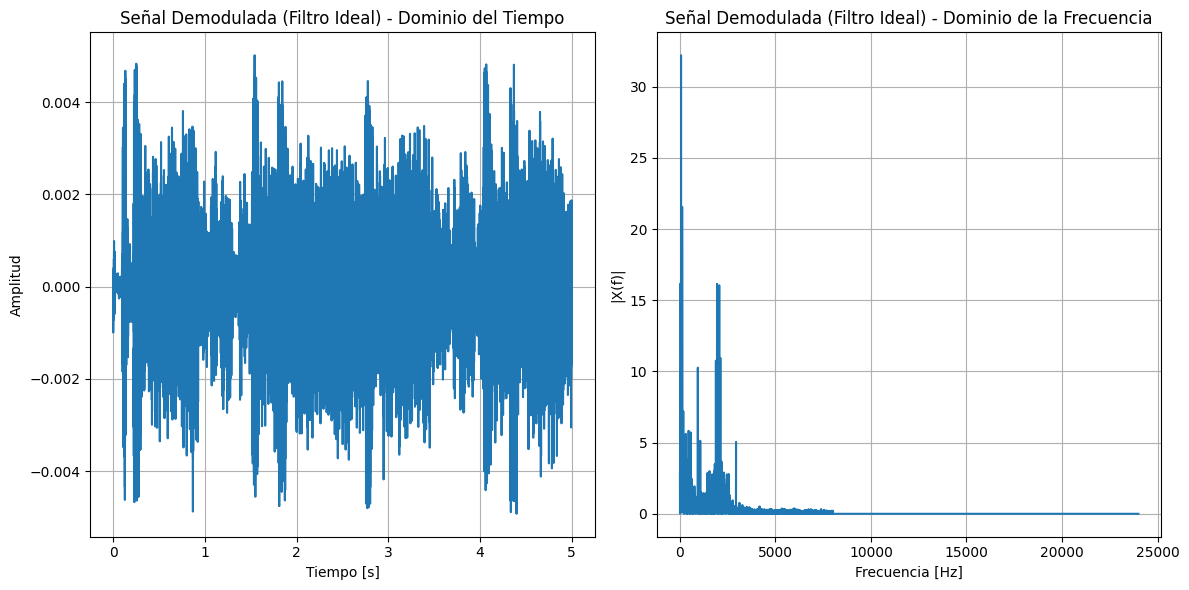

Señal recuperada:


In [73]:
# Multiplicación coherente
demod = y * c

# Filtro ideal en frecuencia (FFT)
def ideal_lowpass(signal, cutoff_hz, fs):
    N = len(signal)
    f = rfftfreq(N, 1/fs)
    S = rfft(signal)
    S[f > cutoff_hz] = 0
    return np.fft.irfft(S)

def plot_signal_and_spectrum(signal, fs, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(signal))/fs, signal)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.title(f"{title} - Dominio del Tiempo")
    plt.grid()

    plt.subplot(1, 2, 2)
    N = len(signal)
    freqs = rfftfreq(N, 1/fs)
    spectrum = np.abs(rfft(signal))
    plt.plot(freqs, spectrum)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X(f)|")
    plt.title(f"{title} - Dominio de la Frecuencia")
    plt.grid()
    plt.tight_layout()
    plt.show()


# Aplicar filtro con corte en 8kHz
recuperado = ideal_lowpass(demod, 8000, fs)

# Graficar demodulación
plot_signal_and_spectrum(recuperado, fs, "Señal Demodulada (Filtro Ideal)")

# Reproducir
print("Señal recuperada:")
display(Audio(recuperado, rate=fs))